<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/406_Pandas_pivot_pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas 데이터 재구조화(Reshaping) 함수


| 범주                | 함수                              | 설명                               |
| ----------------- | ------------------------------- | -------------------------------- |
|  **재구조화**       | `melt()`                        | wide → long (열을 행으로 변환(녹임))          |
|                   | `pivot()`                       | long → wide (열/행 구조로 변환, 중복 불가)  |
|                   | `pivot_table()`                 | 피벗 + 집계 기능 (중복 허용, `aggfunc` 가능) |
|  **스택/언스택**     | `stack()`                       | 열을 인덱스로 변환 (wide → long)         |
|                   | `unstack()`                     | 인덱스를 열로 변환 (long → wide)         |
|  **결합**         | `concat()`                      | 축 기준으로 데이터 연결 (row/column 방향)    |
|                   | `merge()`                       | SQL-style join (기준 key로 병합)      |
|                   | `join()`                        | 인덱스를 기준으로 병합 (merge 간단 버전)       |
|  **변환**         | `transpose()` or `.T`           | 행과 열 전치 (swap)                   |
| **슬라이스 및 재정렬** | `set_index()`, `reset_index()`  | 인덱스 설정 또는 해제                     |
|                   | `sort_values()`, `sort_index()` | 값 또는 인덱스 기준 정렬                   |








In [47]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
kmovies = pd.DataFrame({'MovieID':['1193','1194','1195'],
                        'Title':['디바','무림의 고수','정직한 후보'],
                        'Genres':['드라마','액션','코미디']})

kusers= pd.DataFrame({'UserID':[1,2,3,4,5],
                      'Gender':['F','M','M','F','M'],
                      'Age':[13,56,25,33,43]})

kratings= pd.DataFrame({'UserID':[1,1,1,2,2,2,3,3,3,4,4,4],
                        'MovieID':['1193','1194','1195','1193','1194','1195','1193','1194','1195','1193','1194','1195'],
                        'Rating':[2,5,None,3,1,5,None,2,5,5,None,3]})

In [49]:
print(type(kmovies))

<class 'pandas.core.frame.DataFrame'>


In [50]:
kmovies

,MovieID,Title,Genres
0,1193,디바,드라마
1,1194,무림의 고수,액션
2,1195,정직한 후보,코미디


In [51]:
kusers

,UserID,Gender,Age
0,1,F,13
1,2,M,56
2,3,M,25
3,4,F,33
4,5,M,43


In [52]:
kratings

,UserID,MovieID,Rating
0,1,1193,2.0
1,1,1194,5.0
2,1,1195,NaN
3,2,1193,3.0
4,2,1194,1.0
5,2,1195,5.0
6,3,1193,NaN
7,3,1194,2.0
8,3,1195,5.0
9,4,1193,5.0


In [53]:
# merge: DataFrame 병합
kdata = kratings.merge(kusers).merge(kmovies)
kdata

,UserID,MovieID,Rating,Gender,Age,Title,Genres
0,1,1193,2.0,F,13,디바,드라마
1,1,1194,5.0,F,13,무림의 고수,액션
2,1,1195,NaN,F,13,정직한 후보,코미디
3,2,1193,3.0,M,56,디바,드라마
4,2,1194,1.0,M,56,무림의 고수,액션
5,2,1195,5.0,M,56,정직한 후보,코미디
6,3,1193,NaN,M,25,디바,드라마
7,3,1194,2.0,M,25,무림의 고수,액션
8,3,1195,5.0,M,25,정직한 후보,코미디
9,4,1193,5.0,F,33,디바,드라마


In [54]:
krecom_data = kdata[['UserID', 'MovieID', 'Rating']]
krecom_data

,UserID,MovieID,Rating
0,1,1193,2.0
1,1,1194,5.0
2,1,1195,NaN
3,2,1193,3.0
4,2,1194,1.0
5,2,1195,5.0
6,3,1193,NaN
7,3,1194,2.0
8,3,1195,5.0
9,4,1193,5.0


### pivot
- 👉 열(Column)을 행(Row)으로, 또는 행을 열로 바꾸어
- 👉 데이터를 요약하고 보기 좋게 재구성하는 도구.
- 각 컬럼의 값을 교차테이블 구성요소로 전달, 교차테이블 완성
- index, columns, values 컬럼을 각각 전달
- 요약기능 없음
```
dataframe.pivot(index, columns, values)
```

- 언제 쓰나요?
    - 긴 형태의 데이터를 넓은 형태로 바꿀 때

    - 특정 값을 기준으로 사용자별, 제품별, 날짜별로 요약하고 싶을 때

    - 엑셀 피벗테이블처럼 테이블 형식으로 요약할 때

In [55]:
krecom_pivot =   krecom_data.pivot(index='UserID', columns='MovieID', values='Rating')
print(type(krecom_pivot))
print(krecom_pivot.columns)
print(krecom_pivot.index)
print(krecom_pivot.values)
print(type(krecom_pivot.values))
krecom_pivot

<class 'pandas.core.frame.DataFrame'>
Index(['1193', '1194', '1195'], dtype='object', name='MovieID')
Index([1, 2, 3, 4], dtype='int64', name='UserID')
[[ 2.  5. nan]
 [ 3.  1.  5.]
 [nan  2.  5.]
 [ 5. nan  3.]]
<class 'numpy.ndarray'>


MovieID,1193,1194,1195
UserID,,,
1,2.0,5.0,NaN
2,3.0,1.0,5.0
3,NaN,2.0,5.0
4,5.0,NaN,3.0


In [56]:
# 앞의 값으로 뒤의 Nan을 채워준다.
#krecom_pivot.fillna(method='ffill')
#krecom_pivot.fillna(method='pad')

# 뒤의 갑으로 앞의  Nan을 채워준다.
#krecom_pivot.fillna(method='bfill')
#krecom_pivot.fillna(method='backfill')


#krecom_pivot.fillna(krecom_pivot.mean(), axis=0)
#krecom_pivot.fillna(0)
krecom_pivot.fillna(krecom_pivot.max(), axis=0)

MovieID,1193,1194,1195
UserID,,,
1,2.0,5.0,5.0
2,3.0,1.0,5.0
3,5.0,2.0,5.0
4,5.0,5.0,3.0


In [57]:
krecom_pivot

MovieID,1193,1194,1195
UserID,,,
1,2.0,5.0,NaN
2,3.0,1.0,5.0
3,NaN,2.0,5.0
4,5.0,NaN,3.0


In [58]:
krecom_pivot.fillna(krecom_pivot.mean(), axis=0, inplace=True)
krecom_pivot

MovieID,1193,1194,1195
UserID,,,
1,2.000000,5.000000,4.333333
2,3.000000,1.000000,5.000000
3,3.333333,2.000000,5.000000
4,5.000000,2.666667,3.000000


### pivot_table

- "열(또는 행)의 특정 조합으로 그룹화해서 통계(집계)를 계산"하는 도구

- 👉 pivot()은 하나의 값만 있을 때,
- 👉 pivot_table()은 중복 값이 있어도 평균, 합계 등으로 요약할 수 있음.
 - pivot 기능과 유사, 더 많은 옵션 사용가능
 - index, columns, values 컬럼을 각각 전달
 - aggfunc 옵션 사용하여 요약 기능 전달 가능(기본은 평균)
 - fill_value 옵션 사용하여 NA값 대체 가능
 ```
 dataframe.pivot_table(index, columns, values, aggfunc='mean', fill_value)

  DataFrame.pivot_table(
    values='집계할 열',
    index='행으로 쓸 열',
    columns='열로 쓸 열',
    aggfunc='집계 함수'  # 기본은 평균('mean')
)

 ```


In [59]:
krecom_pivot_table = krecom_data.pivot_table(index='UserID', columns='MovieID', values='Rating',
                                             aggfunc={'Rating':np.mean}, fill_value=0)
krecom_pivot_table

/tmp/ipython-input-59-1810091512.py:1: FutureWarning: The provided callable <function mean at 0x7fbec69320c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  krecom_pivot_table = krecom_data.pivot_table(index='UserID', columns='MovieID', values='Rating',


MovieID,1193,1194,1195
UserID,,,
1,2.0,5.0,0.0
2,3.0,1.0,5.0
3,0.0,2.0,5.0
4,5.0,0.0,3.0


In [60]:
df = pd.DataFrame(data= {'A':['foo', 'foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar'],
                         'B':['one', 'one', 'one', 'two', 'two', 'one', 'one', 'two', 'tow'],
                         'C':['small', 'large', 'large', 'small', 'small', 'large', 'small', 'small', 'large'],
                         'D':[1, 2, 2, 3, 3, 4, 5, 6, 7],
                         'E':[2, 4, 5, 5, 6, 6, 8, 9, 9]})
print(df)

     A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  tow  large  7  9




- index=['A', 'C']: 피벗 테이블에서 행 인덱스를 A와 C 컬럼으로 구성

- values=['D', 'E']: 집계할 대상 컬럼

- 집계 함수 (aggfunc)는 지정하지 않으면 기본적으로 평균(mean)이 사용됨

In [61]:
table = pd.pivot_table(df, index=['A','C'], values=['D','E'])
print(table.columns)
print(table.index)
print(table.values)

table

Index(['D', 'E'], dtype='object')
MultiIndex([('bar', 'large'),
            ('bar', 'small'),
            ('foo', 'large'),
            ('foo', 'small')],
           names=['A', 'C'])
[[5.5        7.5       ]
 [5.5        8.5       ]
 [2.         4.5       ]
 [2.33333333 4.33333333]]


D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

| `aggfunc` 값 | 설명        | 예시 결과                             |
| ----------- | --------- | --------------------------------- |
| `'mean'`    | 평균값 (기본값) | 평균 매출                             |
| `'sum'`     | 합계        | 총 매출                              |
| `'count'`   | 개수        | 거래 건수                             |
| `'min'`     | 최솟값       | 최저 점수                             |
| `'max'`     | 최댓값       | 최고 점수                             |
| `'median'`  | 중앙값       | 중간 매출                             |
| `'std'`     | 표준편차      | 데이터 변동성                           |
| 사용자 정의 함수   | lambda 등  | `aggfunc=lambda x: x.nunique()` 등 |


In [62]:
import pandas as pd

data = {
    '부서': ['영업', '영업', '인사', '인사', '개발', '개발', '개발'],
    '성별': ['남', '여', '남', '여', '남', '여', '남'],
    '이름': ['홍길동', '김영희', '이철수', '박지은', '최현우', '강수정', '조승우'],
    '급여': [4000, 4200, 3800, 3900, 5000, 4800, 5200]
}

df = pd.DataFrame(data)

# 피벗 테이블: 부서와 성별로 그룹, 급여 평균
pivot = pd.pivot_table(df, index='부서', columns='성별', values='급여', aggfunc='mean')

print(pivot)


성별       남       여
부서                
개발  5100.0  4800.0
영업  4000.0  4200.0
인사  3800.0  3900.0


In [63]:
table = pd.pivot_table(
    df,
    index=['A', 'C'],                     # A, C 열을 기준으로 그룹화 (행 index로 사용)
    values=['D', 'E'],                   # D, E 열을 집계 대상으로 지정
    aggfunc={
        'D': np.mean,                   # D 열은 평균만 계산
        'E': [min, max, np.mean]        # E 열은 최소, 최대, 평균을 모두 계산
    }
)


print(table.columns)
print(table.index)
print(table.values)
table


KeyError: 'D'

In [ ]:
a = np.array([5, 8, 9, 2])
print(np.min(a)) # 최소값
print(np.max(a)) # 최대값
print(np.argmin(a)) # 최소값이 있는 위치를(인덱스) 리턴
print(np.argmax(a)) # 최대값이 있는 위치를(인덱스) 리턴

Pandas 데이터 재구조화(Reshaping) 함수


| 범주                | 함수                              | 설명                               |
| ----------------- | ------------------------------- | -------------------------------- |
|  **재구조화**       | `melt()`                        | wide → long (열을 행으로 변환(녹임))          |
|                   | `pivot()`                       | long → wide (열/행 구조로 변환, 중복 불가)  |
|                   | `pivot_table()`                 | 피벗 + 집계 기능 (중복 허용, `aggfunc` 가능) |
|  **스택/언스택**     | `stack()`                       | 열을 인덱스로 변환 (wide → long)         |
|                   | `unstack()`                     | 인덱스를 열로 변환 (long → wide)         |
|  **결합**         | `concat()`                      | 축 기준으로 데이터 연결 (row/column 방향)    |
|                   | `merge()`                       | SQL-style join (기준 key로 병합)      |
|                   | `join()`                        | 인덱스를 기준으로 병합 (merge 간단 버전)       |
|  **변환**         | `transpose()` or `.T`           | 행과 열 전치 (swap)                   |
| **슬라이스 및 재정렬** | `set_index()`, `reset_index()`  | 인덱스 설정 또는 해제                     |
|                   | `sort_values()`, `sort_index()` | 값 또는 인덱스 기준 정렬                   |








### 1) pandas.melt( ) 함수
pandas.melt()는 데이터를 **넓은 형식(wide format)**에서 **긴 형식(long format)**으로 변환할때 사용한다. 즉, 즉, 열(column)을 행(row)으로 "변환하는(melt)" 함수이다.


pandas.melt() 기본 개념
```
pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', ...)
```


주요 파라미터 설명  


| 인자명          | 설명                          |
| ------------ | --------------------------- |
| `frame`      | 재구조화할  데이터프레임                  |
| `id_vars`    | 변환되지 않고 그대로 유지할 열 (고정 컬럼)         |
| `value_vars` | 변환할  컬럼 지정 (지정하지 않으면 id_vars를 제외한 모든 컬럼이 선택됨 )|
| `var_name`   | 변환할 컬럼 이름(기존 컬럼명들이 저장될 컬럼 이름) |
| `value_name` | 변환할 값 이름(기존 값들이 저장될 컬럼 이름)   |


melt vs pivot


| 목적     | 함수                         | 설명                 |
| ------ | -------------------------- | ------------------ |
| 넓은 → 긴 | `melt()`                   | 여러 컬럼을 하나의 컬럼으로 변환 |
| 긴 → 넓은 | `pivot()`, `pivot_table()` | 변환 데이터를 다시 원래대로 펼침 |








In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Math': [85, 90],
    'English': [78, 95]
})

print(df)

In [ ]:
# melt ()함수 적용
# Math과 English 각 열= 'Subject' 열로 그룹화
melted = pd.melt(df, id_vars=['Name'], value_vars=['Math', 'English'],
                 var_name='Subject', value_name='Score')

print(melted)

In [ ]:
import pandas as pd

# 원본 데이터 (넓은 형식)
df = pd.DataFrame({
    'student': ['Eilon', 'TaeO', 'Jobs'],
    'math': [90, 85, 78],
    'english': [95, 80, 88],
    'science': [85, 78, 92]
})

print(df)

melted = pd.melt(df, id_vars='student', var_name='subject', value_name= 'score')
melted

In [ ]:
#melted = df.melt(id_vars='student')
#melted = pd.melt(df, id_vars='student', var_name='subject', value_name= 'score')
melted = df.melt(id_vars='student', var_name='subject', value_name= 'score')

melted

In [ ]:
# melt()함수 ->  pivot()함수사용해서 원상복귀!
pivoted = melted.pivot(index='student', columns='subject', values='score').reset_index()
pivoted

✅위의 도표 상으로 0열의 subject 이름이 부적합하기에, 아래와 같이 코드를 추가해 지우면 된다
```
pivoted.columns.name = None #subject으로 생성되는 열 인덱스의 이름(name)을 제거
```

In [ ]:
pivoted = melted.pivot(index='student', columns='subject', values='score').reset_index()
pivoted.columns.name = None #subject으로 생성되는 열 인덱스의 이름(name)을 제거
pivoted

In [ ]:
# pivot_table()을 활용한 평균 구하기
                                                                                     # aggfunc=np.mean
pivoted_table = melted.pivot_table(index='student', columns='subject', values='score', aggfunc='mean').reset_index()
print(pivoted_table)

pivoted_table = pivoted_table.drop(columns='student')
pivoted_table.columns.name=None
print(pivoted_table)

# 학년별 평균점수, 성별/과목별 분석, 시간 흐름에 따른 값 실전 분석 패턴

| 분석 유형     | 핵심 도구                                         |
| --------- | --------------------------------------------- |
| 학년별 평균 분석 | `groupby()` + `pivot_table()`                 |
| 성별/과목별 비교 | `melt()` + `pivot_table()`                    |
| 시계열 분석    | `groupby(['year', 'subject'])` + `lineplot()` |

# 1. 학년별 평균점수 분석

In [ ]:
# ① 데이터 생성
import pandas as pd

df = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'grade': [1, 1, 2, 2, 3, 3],
    'math': [90, 85, 78, 82, 70, 95],
    'english': [95, 80, 88, 76, 85, 90],
    'science': [85, 78, 92, 88, 75, 98]
})

# ② melt()
melted = pd.melt(df, id_vars=['grade'], value_vars=['math', 'english', 'science'], var_name='subject', value_name='score')
melted

# ③ pivot_table
grade_avg = melted.pivot_table(index='grade', columns='subject', values='score', aggfunc='mean')
grade_avg

# 1. 성별 / 과목별 평균 분석

In [ ]:
# 성별 컬럼 추가
df['gender'] = ['F', 'M', 'M', 'M', 'F', 'M']
df

# 2. 성별(gender)에 따라 영어, 수학, 과학 과목의 평균 점수를 계산

In [ ]:
# ②  melt()
melted = pd.melt(df, id_vars=['gender'], value_vars=['math', 'english', 'science'], var_name='subject', value_name='score')
#print(melted)

# ③ pivot_table
grade_avg = melted.pivot_table(index=['gender'], columns='subject', values='score', aggfunc='mean').reset_index()
grade_avg


grade_avg를 바탕으로 막대그래프

In [ ]:
import matplotlib.pyplot as plt
grade_avg.plot(kind='bar', x='gender', y=['math', 'english', 'science'], title='Average Scores by Gender')
plt.ylabel('Score')
plt.show()

# 3. 학년과 성별 조합별로 각 과목의 평균 점수를 계산.

In [ ]:
# ②  melt()
melted = pd.melt(df, id_vars=['grade','gender'], value_vars=['math', 'english', 'science'], var_name='subject', value_name='score')
#print(melted)

# ③ pivot_table
grade_gender_avg = melted.pivot_table(index=['grade','gender'], columns='subject', values='score', aggfunc='mean').reset_index()
grade_gender_avg.columns.name=None
print(grade_gender_avg.columns)
print(grade_gender_avg)

# 4. 시간 흐름에 따른 점수 변화 분석(시계열)

In [ ]:
df['year']= [2023, 2024, 2023, 2024, 2023, 2024]
df

In [ ]:
melted_time = pd.melt(df, id_vars=['student', 'year'],
                           value_vars=['math', 'english', 'science'],
                           var_name='subject', value_name='score' )
#print(melted_time)

time_avg = melted_time.groupby(['year', 'subject'])['score'].mean().reset_index()
time_avg

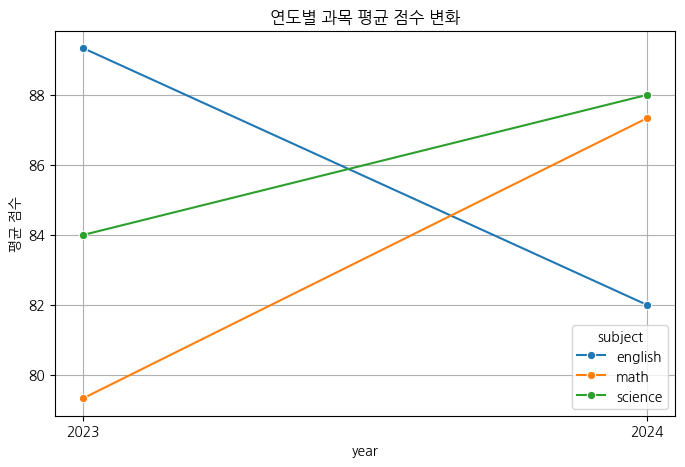

In [7]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

melted_time = pd.melt(df, id_vars=['student', 'year'],
                           value_vars=['math', 'english', 'science'],
                           var_name='subject', value_name='score' )
time_avg = melted_time.groupby(['year', 'subject'])['score'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=time_avg, x='year', y='score', hue='subject', marker='o')
plt.title("연도별 과목 평균 점수 변화")
plt.ylabel("평균 점수")
plt.xticks([2023, 2024])
plt.grid(True)
plt.show()

# ※한글깨질때 아래와 같이 수행하세요

In [67]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,825 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and dire

위 코드를 실행한 후, **런타임 > 런타임 다시 시작**을 선택하여 런타임을 다시 시작해주세요. 그런 다음 아래 코드로 한글 폰트를 설정하고 시각화를 다시 시도해보세요.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

In [6]:
import pandas as pd

df = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'grade': [1, 1, 2, 2, 3, 3],
    'math': [90, 85, 78, 82, 70, 95],
    'english': [95, 80, 88, 76, 85, 90],
    'science': [85, 78, 92, 88, 75, 98]
})

df['gender'] = ['F', 'M', 'M', 'M', 'F', 'M']
df['year']= [2023, 2024, 2023, 2024, 2023, 2024]
